In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x_test.size

30720000

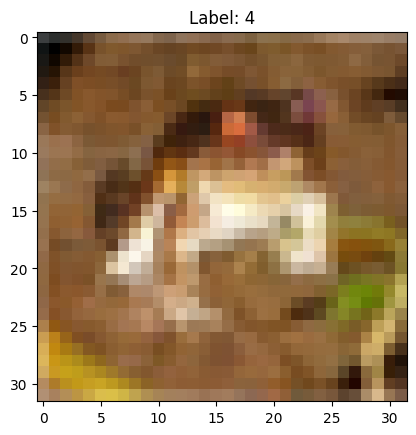

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[10][0]}")
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test  = x_test.reshape((x_test.shape[0], -1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,239,520 (19.99 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,493,014 (13.32 MB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=2
)

Epoch 1/20
352/352 - 9s - 27ms/step - accuracy: 0.2030 - loss: 2.1102 - val_accuracy: 0.3040 - val_loss: 1.9132
Epoch 2/20
352/352 - 8s - 23ms/step - accuracy: 0.2832 - loss: 1.9402 - val_accuracy: 0.3318 - val_loss: 1.8471
Epoch 3/20
352/352 - 8s - 23ms/step - accuracy: 0.2941 - loss: 1.9055 - val_accuracy: 0.3244 - val_loss: 1.8426
Epoch 4/20
352/352 - 8s - 23ms/step - accuracy: 0.3057 - loss: 1.8786 - val_accuracy: 0.3544 - val_loss: 1.8191
Epoch 5/20
352/352 - 8s - 22ms/step - accuracy: 0.3206 - loss: 1.8549 - val_accuracy: 0.3658 - val_loss: 1.7990
Epoch 6/20
352/352 - 8s - 23ms/step - accuracy: 0.3264 - loss: 1.8367 - val_accuracy: 0.3670 - val_loss: 1.7909
Epoch 7/20
352/352 - 8s - 22ms/step - accuracy: 0.3300 - loss: 1.8281 - val_accuracy: 0.3718 - val_loss: 1.7771
Epoch 8/20
352/352 - 8s - 22ms/step - accuracy: 0.3431 - loss: 1.8064 - val_accuracy: 0.3438 - val_loss: 1.7816
Epoch 9/20
352/352 - 8s - 22ms/step - accuracy: 0.3406 - loss: 1.8042 - val_accuracy: 0.3796 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Test accuracy: 0.4053


In [ ]:
model.save('/content/drive/MyDrive/XAI/cifar10_ann_model.h5')

In [ ]:
model.save('/content/drive/MyDrive/XAI/cifar10_ann_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


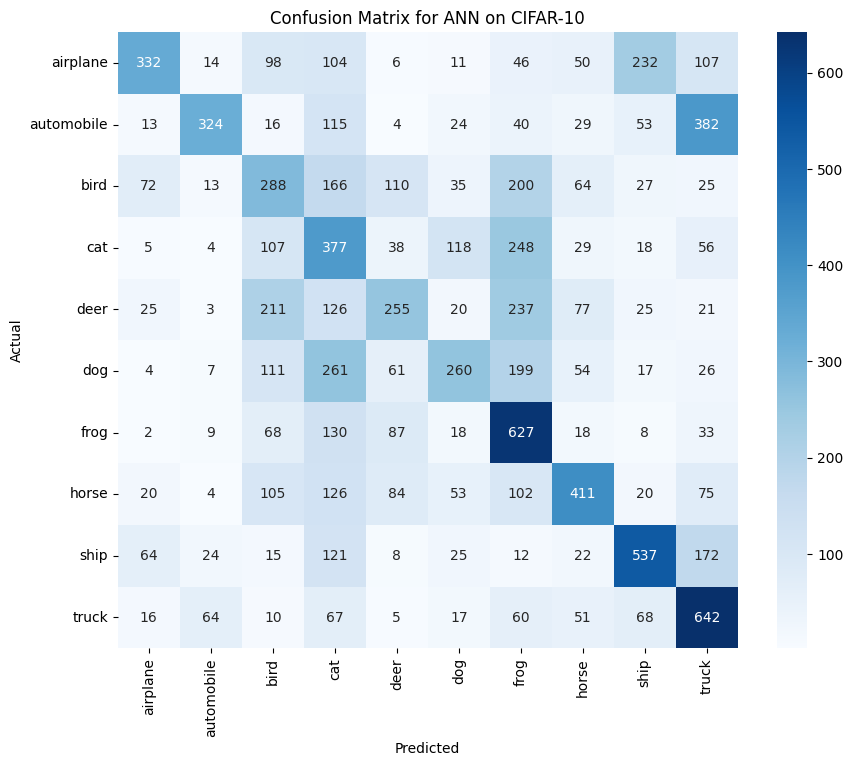


Classification Report:

              precision    recall  f1-score   support

    airplane       0.60      0.33      0.43      1000
  automobile       0.70      0.32      0.44      1000
        bird       0.28      0.29      0.28      1000
         cat       0.24      0.38      0.29      1000
        deer       0.39      0.26      0.31      1000
         dog       0.45      0.26      0.33      1000
        frog       0.35      0.63      0.45      1000
       horse       0.51      0.41      0.46      1000
        ship       0.53      0.54      0.54      1000
       truck       0.42      0.64      0.51      1000

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.40     10000
weighted avg       0.45      0.41      0.40     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN on CIFAR-10')
plt.show()

# Optional: print detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e6115c6aeeefbccb18324bc53984fc034edb9b0bcecdd4bb3236b2a72261a09c
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np

# Load the CIFAR-10 dataset again to get the original image shapes
# Make sure this is only loaded once if not already loaded
if 'x_test_orig' not in globals():
    (x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()
    # Ensure the data type is correct for LIME
    x_test_orig = x_test_orig.astype('double')


def predict_fn(images):
    # Reshape images to the flattened format expected by the model
    # Remove the redundant scaling here as x_test is already scaled
    images = images.reshape((images.shape[0], -1))
    preds = model.predict(images)
    return preds


def visualize_lime_explanation(image_index):
    """
    Generates and displays the LIME explanation for a given test image index.

    Args:
        image_index (int): The index of the test image to visualize.
    """
    # Ensure the image index is within the valid range
    if image_index < 0 or image_index >= len(x_test_orig):
        print(f"Error: Image index {image_index} is out of bounds.")
        return

    print(f"Generating LIME explanation for image index {image_index}...")

    explainer = lime_image.LimeImageExplainer()

    explanation = explainer.explain_instance(
        image=x_test_orig[image_index],  # Use the original image shape
        classifier_fn=predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    # Get the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        hide_rest=False,
        num_features=10,
        min_weight=0.02
    )

    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 255.0, mask))

    # Get the predicted and actual labels for the image
    predicted_label = class_names[explanation.top_labels[0]]
    actual_label = class_names[np.argmax(y_test[image_index])]


    plt.title(f"LIME Explanation for Image {image_index}\nPredicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()

    # Optional: print the explanation details
    # print("\nExplanation details:")
    # for feature, weight in explanation.as_list(label=explanation.top_labels[0]):
    #     print(f"Feature (superpixel): {feature}, Weight: {weight:.4f}")

In [ ]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Generating LIME explanation for image index 3...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

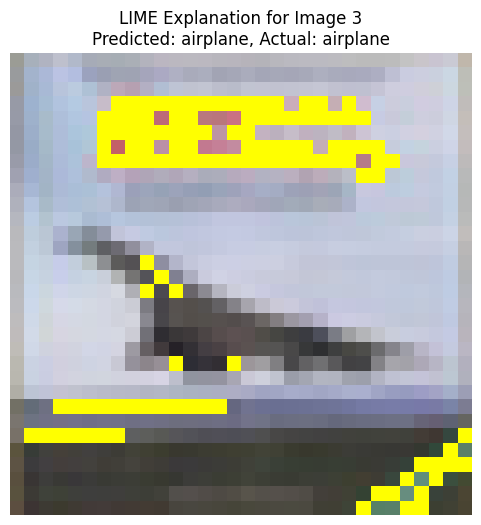

In [ ]:
visualize_lime_explanation(3)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Generating LIME explanation for image index 1...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

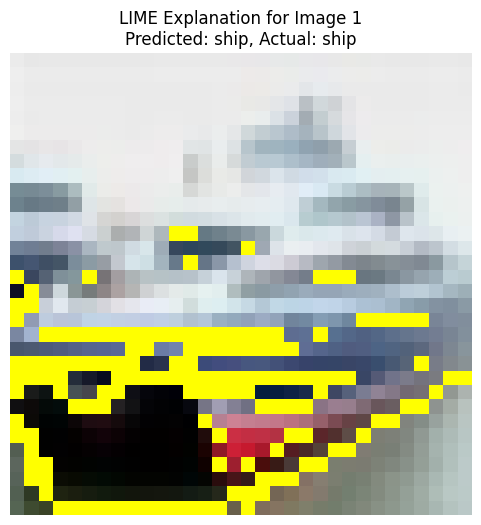

In [ ]:
visualize_lime_explanation(1)

In [ ]:
y_test[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

Generating LIME explanation for image index 6...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

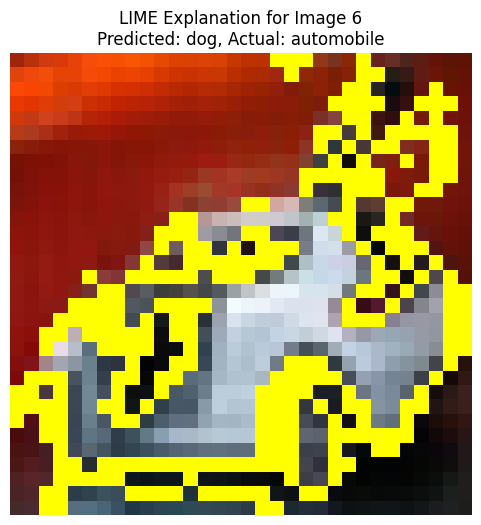

In [ ]:
visualize_lime_explanation(6)

Generating LIME explanation for image index 100...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

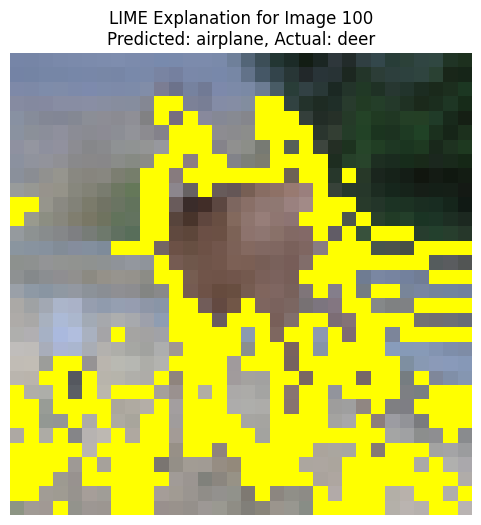

In [ ]:
visualize_lime_explanation(100)

Generating LIME explanation for image index 1000...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

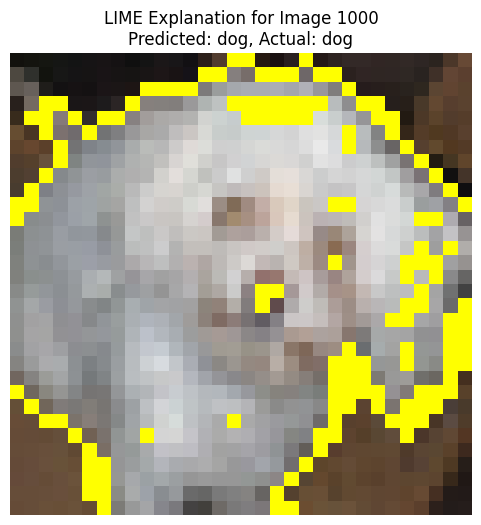

In [ ]:
visualize_lime_explanation(1000)

Saliency Maps

In [ ]:
def prep_for_model(img):
    """img: (32,32,3), uint8 or float [0,255] -> returns (1,3072) float32 in [0,1]"""
    arr = img.astype("float32") / 255.0
    return arr.reshape(1, -1)

In [ ]:
def compute_saliency(model, input_tensor, class_index):
    """
    input_tensor: tf.Tensor shape (1,3072) float32, watched
    returns gradient shape (1,3072)
    """
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        preds = model(input_tensor, training=False)  # (1, num_classes)
        score = preds[0, class_index]
    grads = tape.gradient(score, input_tensor)
    return grads

In [ ]:
def smoothgrad(model, img, target_class, stdev=0.02, n_samples=25):
    """
    img: (32,32,3) uint8
    stdev: std dev relative to [0,1] scale
    n_samples: number of noisy samples to average
    returns: importance map (32,32) normalized to [0,1]
    """
    grads_sum = np.zeros((1, 3072), dtype=np.float32)
    base = prep_for_model(img)  # (1,3072)
    for i in range(n_samples):
        noise = np.random.normal(0, stdev, size=base.shape).astype(np.float32)
        noisy = np.clip(base + noise, 0.0, 1.0)
        inp = tf.convert_to_tensor(noisy)
        g = compute_saliency(model, inp, target_class).numpy()  # (1,3072)
        grads_sum += g
    avg = grads_sum / float(n_samples)
    return avg.reshape(32, 32, 3)

In [ ]:
N = x_test.shape[0]
explain_indices = [1, 3, 6]
explain_indices = [i for i in explain_indices if 0 <= i < N]
if len(explain_indices) == 0:
    raise ValueError("No valid test indices to explain. Adjust explain_indices.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Explaining test index 1 — predicted class 9 (prob 0.411)


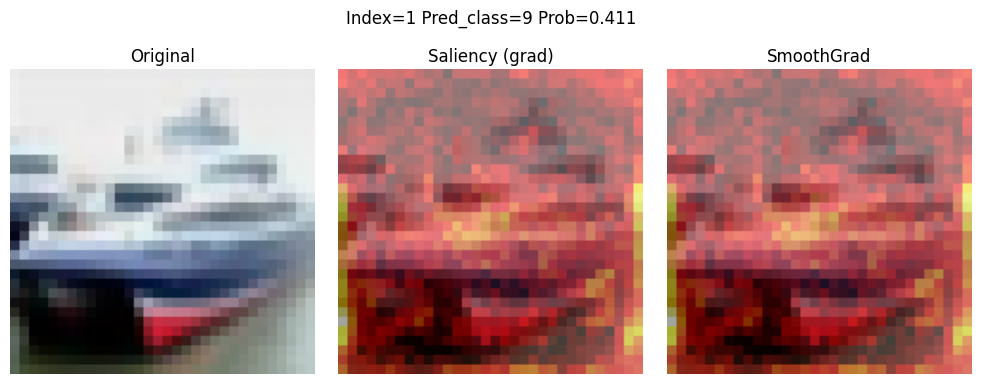

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Explaining test index 3 — predicted class 0 (prob 0.203)


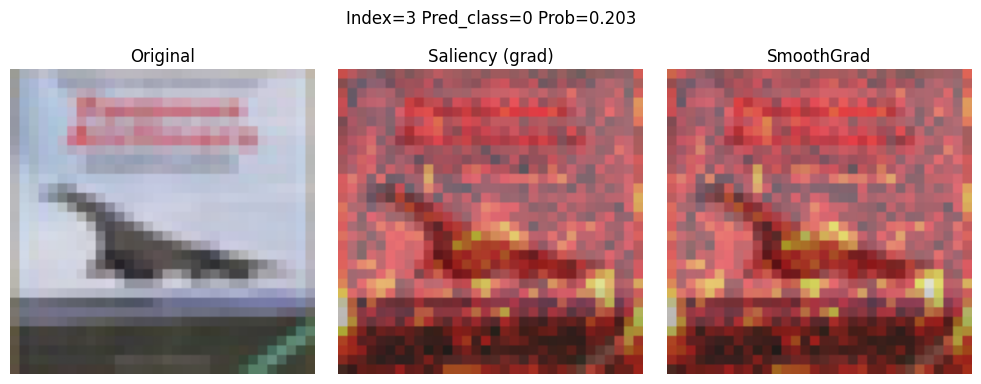

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Explaining test index 6 — predicted class 5 (prob 0.346)


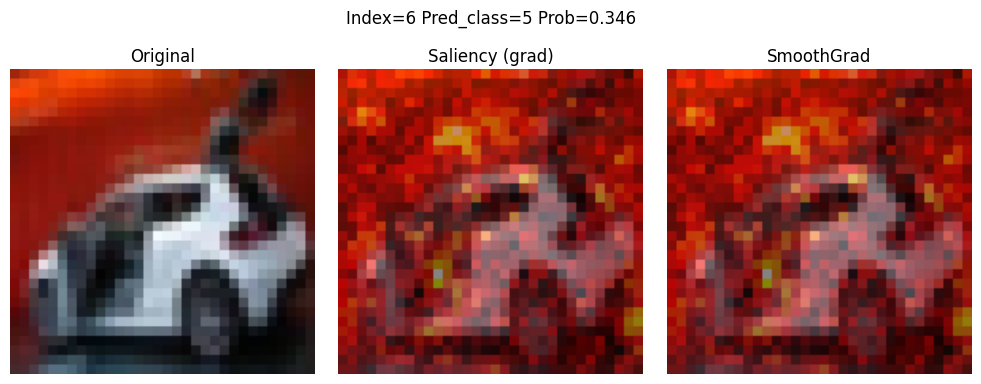

In [ ]:
for idx in explain_indices:
    # Use the already scaled x_test data for prediction
    inp = x_test[idx:idx+1] # shape (1, 3072)

    preds = model.predict(inp)
    pred_class = int(np.argmax(preds[0]))
    pred_prob = float(preds[0, pred_class])

    print(f"Explaining test index {idx} — predicted class {pred_class} (prob {pred_prob:.3f})")


    # compute plain saliency
    # Use the already scaled x_test data as the input tensor
    inp_tf = tf.convert_to_tensor(inp)
    grads = compute_saliency(model, inp_tf, pred_class).numpy().reshape(32,32,3)
    saliency = np.mean(np.abs(grads), axis=2)  # aggregate channels -> (32,32)

    # compute SmoothGrad (optional but recommended)
    # Use the original unscaled image for smoothgrad, as it handles scaling internally
    sg = smoothgrad(model, x_test_orig[idx], pred_class, stdev=0.03, n_samples=25)
    sg_map = np.mean(np.abs(sg), axis=2)  # (32,32)

    # normalize maps to [0,1] for visualization
    def norm01(x):
        x = x - x.min()
        if x.max() != 0:
            x = x / x.max()
        return x

    sal_norm = norm01(saliency)
    sg_norm = norm01(sg_map)

    # upscale for visibility
    sal_up = cv2.resize(sal_norm, (128, 128), interpolation=cv2.INTER_NEAREST)
    sg_up  = cv2.resize(sg_norm,  (128, 128), interpolation=cv2.INTER_NEAREST)
    # Use the original unscaled image for upscaling for display
    img_up = cv2.resize(x_test_orig[idx], (128, 128), interpolation=cv2.INTER_NEAREST).astype(np.float32) / 255.0

    # Plot side-by-side
    plt.figure(figsize=(10,4))
    plt.suptitle(f"Index={idx} Pred_class={pred_class} Prob={pred_prob:.3f}", fontsize=12)

    plt.subplot(1,3,1)
    plt.imshow(img_up)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img_up)
    plt.imshow(sal_up, cmap='hot', alpha=0.5)
    plt.title("Saliency (grad)")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_up)
    plt.imshow(sg_up, cmap='hot', alpha=0.5)
    plt.title("SmoothGrad")
    plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()